# Machine Learning Specialization
## Unsupervised Learning, Recommenders, Reinforcement Learning
# Week 8  
  
## Terminology

| Definition        | Explanation            |
|-------------------|------------------------|  
| Clustering algorithm | an algorithm that looks at a number of data points and automatically finds data points that are related or similar |  
| Cluster centroids | The center (or suspected center) of a bunch of data points |  
| $\mu_n$ | The vectors whose average is the location of a centroid |

## Clustering  
When comparing supervised learning with unsupervised learning, the main difference is that for the first you you have **an X and a Y input**  for your training. For unsupervised learning you only have a X feature.  
The unsupervised clustering algorithm will try to cluster datasets within the whole group together. Without knowing what the is the "right" answer or Y. 

### K-means clustering algorithm  
A K-means clustering algorithm will randomly pick 2 points where might be the center of 2 clusters. After that it cycle through all the data points and see if it's closer to centroid one or centroid two. The second step is that it then takes the average of all the data points that are associated with centroid one and centroid 2 and move the centroids to their average location. After that it will re-do the same thing, and some data point will swap now because they might be closer to the other centroid now. The more iterations you run the closer you get to the actual center of 2  groups. You would know you reached the center, because the average will not or only hardly change after another iteration. 

#### K-means algorithm  
First you need to randomly initialize $K$ cluster centroids $\mu_1,\mu_2,\cdots,\mu_K$. This corresponds to the random picking of the starting centers. To clarify, $\mu_1,\mu_2,\cdots,\mu_K$ are vectors that have the same dimensions as your training samples. $K$ stands for the amount of clusters you want to find.   
After that you want to calculate the distance between $\mu_k$ and your data points. In math:  
$min_k || x^{(i)}-\mu_k ||$ This is calculating the smallest distance between X(datapoint) and $\mu$ (centroid)  
A different notation would be:  
Repeat{  
    # Assign pints to cluster centroids  
    for $i$=1 to $m$  
    $c^{(i)}$:=index(from 1 to $K$) of cluster  
    Centroid to closest to $x^{(i)}$  
    # Move cluster centroids
    for $k$ =1 to $K$  
        $\mu_k$:= average (mean) of points assigned to cluster $k$
}  
  
$c^{(i)}$ is the index of a cluster (1,2,...,$K$) to which example $x^{(i)}$ is currently assigned.  
$\mu_k$ = cluster centroid $k$  
$\mu_{c^{(i)}}$=cluster centroid of a cluster to which example $x^{(i)}$ has been assigned. (example: to which centroid was training example 10 ($x^{(10)} $) assigned? You look for $c^{(10)}$. Then $\mu_{c^{(10)}}$ would be the location of the centroid to which training example 10 was assigned).

**Note 1**, *what to do if a cluster gets 0 data points assigned*: there are 2 options, you either continue with k=k-1 clusters (so you delete that centroid) or you re-initialize it from the start, hoping that the next random first choice would give all your clusters at least a data point (the first one is most common).  
  
**note 2**, *you can use a clustering algorithm on data that doesn't have very distinct clusters*. It's not uncommon to use a k-means cluster on data that seems continues or somewhat random.  

#### Cost function for K-means or distortion (cost) function
$$J(c^{(1)},...,c^{(m)},\mu_1,...,\mu_K)=\frac{1}{m}\sum^m_{i=1}||x^{(i)}-\mu_{c^{i}}||^2$$

#### Initializing K-means
As mentioned before, the first locations of the centroids are random. Since one should always have $K<m$ centroids (it wouldn't make sense to look for more cluster than that there are data points), one should pick a random dataset point to start.  
However, it is true that the starting point will impact which clusters will be found. Because of that, it's good to run it multiple times. After that you can run the cost function on all the initializations and see what gives you the lowest number. This translated to:  
  

For i = 1 to 100 {  
    Randomly initialize K-means.  
    Run K-means. Get $c^{(1)},...,c^{(m)},\mu_1,...,\mu_K$  
    Compute cost function (distortion)  
    $J(c^{(1)},...,c^{(m)},\mu_1,...,\mu_K)$  
}  
Pick set of clusters that gave lowest cost $J$  
  
It's pretty common to run this 50-1000 times 

#### How many clusters will you use?  
The right value of $K$ is usually ambiguous. Just because we see 2 groups, it doesn't perse mean that there aren't more. One method one can use is the **Elbow method**.  
For this method you plot *Cost function $J$* vs the *$K$ (no. of clusters) and look where the cost doesn't really decrease that much anymore. One of the downsides is that you often won't find a real elbow. Instead you'll find a smooth decrease and thus making it impossible to choose.  
Another way of doing it (better) is to think of **how many clusters you want for a later purpose**. For example, if you have height and weight of your average t-shirt buyers, and you want to decide how big your shirts should be. It might make most sense to go for 3 clusters so you end up with a small, medium and large. 

## Anomaly detection  
Another unsupervised learning technic is anomaly detection. Where you search for anomalies in the data. What happens here is that you have test datasets:{$x^{(1)},x^{(2)},...,x^{(m)}$ and you want to know if $x_{test}$ is anomalous. You can do this by building a model that give you the probability of x (Model p(x)).  
![probability model](https://github.com/DouweHorsthuis/machine-learning-cousera/blob/main/images/probabilty.png?raw=true)  
*Here the p to be in the center would be high, the p for the second circle would be lower and the p for the third even lower.*  
You would use $p(x_{test})< \epsilon $ -> where if this is true it would flag as a anomaly. $\epsilon$ would be a small number here.  
  
Anomaly detection is often used in fraud detection and manufacturing. 

### Gaussian (normal) distribution  
A different way of thinking is to use a gaussian distribution, or a normal distribution. You can calculate a gaussian distribution for your data by using:  
$p(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$  
Here the width is determined by $\sigma$ and where $\mu$ sets the center. 
If the data falls on the outer edge, you get a very low number (lower than $\epsilon$). This would mean there is something odd. If you get a high number as you should get most of the time. Your test data is fine.

### Multiple features  
Until now we only focused on x having 1 feature. This is very unlikely. While it is better for the features to be statistically independent of each other. It will still work if this is not the case. To estimate $p(x)$ in this case, while x has n features, we work with:  
$p(x)=p(x_1)*p(x_2),...,*p(x_n)$  
However we also need to find the mean distribution for each of them. So the full formula is:  
$$p(x)=p(x_1;\mu_1,\sigma^2_1)*p(x_2;\mu_2,\sigma^2_2),...,*p(x_n;\mu_n,\sigma^2_n) = \prod^{n}_{j=1} p(x_j;\mu_j,\sigma_j^2)$$

### How to set it up?  
1. First you want to choose $n$ features $x_i$, that you think will show something is anomalous.
2. Fit parameter $\mu_1,...,\mu_n,\sigma^2_1,...,\sigma^2_n$  
This allows you to calculate $$\mu_j=\frac{1}{m}\sum^{m}_{i=1}x_j^{(i)}$$  $$\sigma_j^2=\frac{1}{m}\sum^{m}_{i=1}(x_j^{(i)}-\mu_j)^2$$ or vectorized $$\overrightarrow{\mu}=\frac{1}{m}\sum^{m}_{i=1}\overrightarrow{x}^{(i)}$$  
3. Given a new example, $x$, compute $p(x)$  
$$p(x)=\prod^{n}_{j=1} p(x_j;\mu_j,\sigma_j^2)$$ 
4. check if $p(x)<\epsilon$

### Evaluations a anomaly detection system
To evaluate your model, you will need a couple of labeled anomalies. This means that if you have 10000 datasets having anywhere between 2-50 labeled anomalies is enough to test it. Even if in the 10000 datasets, there are a couple of anomalies that due to not being labeled slip into the "normal" data, it should still work. You can do the rest, just like we did before, where you split up your data into for example 6000 training sets, and then you use 2000 normal + 10 anomalies for cross validation and the same amount as your test set.  
Because of the lack of labeled data, you could choose to skip the test set part, and only use cross validation. Which works a little less well but might be the best way to go. As long as you are away that you might have a bigger likelihood for overfitting.  
It is wort considering to evaluate your metrics using:  
- True positive, false positive, false negative, true negative
- Precision/Recall
- $F_1$-score  


## When to use anomaly detection vs. supervised learning  
|Anomaly detection | Supervised learning | 
|--|--|  
|Very small number of positive examples (y=1) (0-20 is common). Larger number of negative (y=0) examples. | Large number of costive and negative examples |  
Many "types" of anomalies. Hard for any algorithm to learn from positive examples what the anomalies look like; future anomalies may look nothing like any of the anomalous examples seen so far | Enough positive examples for the algorithm to get a sense of what positive examples are like, future positive examples likely to be similar to ones in training set |  
|Fraud - this keeps changing| Spam - spam seems to be always somewhat similar|  
|manufacturing - Finding new previously unseen defects in manufacturing. (e.g. aircraft engines) | Manufacturing - Finding known, previously seen defects |  
Monitoring machines in a data center | Weather prediction (sunny/rainy/etc.) |  


### Features for anomaly detection 
One step is to try to makes sure that your features either are gaussian or make them a bit more gaussian. A good way of checking that is by plotting a histogram of your data. you can do this as `plt.hist` in python. Making it more gaussian could be done by seeing if the log transformation, or $x^{0.n}$ is more gaussian.  As shown in this code below


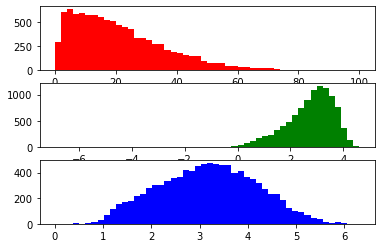

In [27]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt  
import numpy as np

numValues = 10000
maxValue = 100
skewness = 50 #negative values are left skewed, postive values are right skewed.

random= skewnorm.rvs(a=skewness,loc=maxValue, size=numValues) #Skewnorm function

random = random -min(random)
random = random / max(random) 
random = random * maxValue

x=random

plt.subplot(3,1,1);
plt.hist(x,bins=50,color='r');
plt.subplot(3,1,2);
plt.hist(np.log(x+0.001),bins=50, color='g');
plt.subplot(3,1,3);
plt.hist(x**0.4,bins=50, color='b');

In the code above, we see that instead of using which is skewed and now gaussian, using $x^{0.4}$ is more gaussian. So it would be better to use that.  
  
*Note: because x has 0, taking the log of that would be impossible, so the trick is to add a very small number in that case*

### common probmel in error analysis for anomaly detection  
$p(x)$ is comparable for normal and anomalous example. In this case it would be a good idea to spend some time thinking why you think this data point is anomalous. If you are sure, try to find a new feature that you might be able to add to make the algorithm better. 